# Final Report

In [1]:
from TCSPC import *
plt.rcParams['figure.constrained_layout.use'] = True

# !!! IMPORTANT !!! CHECK whether `t`  is `np.arange(0,20,1/19)`, this affects FFT results 

In [2]:
EGFP = Phasor([0.497,0.503],[2.43,3.07])

In [4]:
EGFP.t[1] == 1/19 #check correctness of time array

True

### Continuous phasor

In [ ]:
#  EGFP.generate_df(func=EGFP.phasor_eq_func_cont)

### Discrete, just trimming

In [ ]:
EGFP.generate_df()

### Discrete, FFT deconvolution

In [ ]:
# EGFP.generate_df(deconv =True)

### Discrete, close-form

In [ ]:
EGFP.generate_df(func = EGFP.phasor_eq_func_DFT)

## PHASOR DF GENERATION
### can skip the commented cell if the csvs are saved

In [ ]:
# N_i = 20  #n_photon number
# N_j = 100 #repeat sim number
# n_photon_arr = np.logspace(4,9,N_i).astype(int)
# df_p_list = []
# for i in range(N_i):
#     EGFP.n_photon = n_photon_arr[i]
#     EGFP.repeat_sim(N_j)
#     df    = EGFP.generate_df(phasor_data = EGFP.phasor_data)[['A1','tau1','tau2','success','nfev']]
#     df_bg = EGFP.generate_df(phasor_data = EGFP.phasor_data_bg)[['A1','tau1','tau2','success','nfev']]
#     df_cont = EGFP.generate_df(func = EGFP.phasor_eq_func_cont)[['A1','tau1','tau2','success','nfev']]
#     df_dis = EGFP.generate_df(func = EGFP.phasor_eq_func_DFT)[['A1','tau1','tau2','success','nfev']]
#     df_deconv = EGFP.generate_df(deconv = True)[['A1','tau1','tau2','success','nfev']]
#     df_p_list.append([df,df_bg,df_cont,df_dis,df_deconv])
# df_p = n_case_df(df_p_list,['no_bg','bg','cont','dis','deconv']) #phasor df for different cases
# # df_p.to_csv('df/df_phasor.csv')

In [25]:
def n_case_df(df_list,col):
    '''Return df for cases in df_list
       Input:
       df_list  list of the structure [[df_1,df_2,...df_n_case],...,] (nested list of 20 (n_photon_arr) by n_case)
       col      col names for the cases'''
    df_list_case = []
    for df in df_list:
        n_val_df =pd.concat(df,keys = col,axis = 1) #concat dfs of n cases along axis 1
        df_list_case.append(n_val_df) #append each photon number case
    return pd.concat(df_list_case,keys = range(20)) 

In [50]:
lm_df

c        A1        A2      tau1           tau2  red_chi2  nfev  \
0  0   0.0  0.013038  0.986962  0.580346       2.790653  0.911234   212   
   1   0.0  0.802416  0.197584  2.522664       3.927501  0.787067   137   
   2   0.0  0.979752  0.020248  2.516107  219812.913137  0.743083   324   
   3   0.0  0.986778  0.013222  2.673811   14228.388398  0.948851   512   
   4   0.0  0.990262  0.009738  2.724542   29869.831054  0.805322   370   
...    ...       ...       ...       ...            ...       ...   ...   
19 95  0.0  0.984108  0.015892  2.711051       6.479340  9.181388   171   
   96  0.0  0.984318  0.015682  2.711612       6.505039  8.654427   165   
   97  0.0  0.983924  0.016076  2.710478       6.458089  9.512211   189   
   98  0.0  0.984213  0.015787  2.711070       6.498694  9.326233   165   
   99  0.0  0.983893  0.016107  2.710503       6.450784  9.100980   172   

       success  
0  0      True  
   1      True  
   2      True  
   3      True  
   4      True  
...        ...  
19 95     True  
   96     True  
   97     True  
   98     True  
   99     True  

[2000 rows x 8 columns]

In [28]:
idx = pd.IndexSlice

In [74]:
N_i = 20  #n_photon number
N_j = 100 #repeat sim number
n_photon_arr = np.logspace(4,9,N_i).astype(int)
# df_lm_list = []
# for i,n_photon in enumerate(n_photon_arr):
#     EGFP.n_photon = n_photon
#     EGFP.repeat_sim(N_j)
#     df_lm_list.append(EGFP.val_df(2,sim_data = EGFP.sim_data, method = 'leastsq')) #store dataframe of 100 sims
# df_lm = pd.concat(df_lm_list,keys = range(20))
# df_lm.columns = pd.MultiIndex.from_product([['no_bg'],list(df_lm.columns)]) #follow col structure of other dfs
# df_lm.to_csv('df/df_lm.csv')#save as lm in the sense of Levenberg Marquardt algorithm

In [75]:
df_mle = pd.read_csv('df/df_mle.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for mle
df_ls  = pd.read_csv('df/df_ls.csv',header=[0, 1], index_col=[0,1] ) #df_ls --df for leastsq
df_p   = pd.read_csv('df/df_phasor.csv',header=[0, 1], index_col=[0,1] ) #df_p --df for phasor
df_lm   = pd.read_csv('df/df_lm.csv',header=[0, 1],index_col=[0,1] ) #df_lm  levenberg marquardts algorithm
df_geo = pd.read_csv('df/geometric_sol_df.csv',header=[0, 1], index_col=[0,1] ) #df gemoetric solution

In [94]:
col1,col2 = df_p.columns.levels
def dev_plot(df_names = ['mle','p','geo'], cases = ['no_bg','bg'],pars = ['A1','tau1','tau2']):
        '''Plot mean and std as error bar for diffeent photon count'''
        fig,ax = plt.subplots(1,len(pars),figsize = (14,4))
        for name in df_names:
                df = df_dict[name]
                for i,par in enumerate(pars):
                        for j,case in enumerate(cases):
                                mean = df.loc(axis=1)[case,par].groupby(level=0).mean()
                                std  = df.loc(axis=1)[case,par].groupby(level=0).std()
                                ax[i].errorbar(n_photon_arr,mean,yerr=std,fmt='x',label = f'{name} {case}')
                                ax[i].set_xscale('log')
                                ax[i].set_xlabel('Total Photon Count')
                                ax[i].set_ylabel(par)
                                ax[i].legend()
                        ax[i].axhline([EGFP.amp[0],*EGFP.tau][i],c='k',label = 'True')
        return fig,ax
#fig.savefig('fig/phasor_params_cases.pdf')
        

In [90]:
df_dict = {'mle': df_mle, 'ls':df_ls,'lm':df_lm, 'p':df_p,'geo':df_geo}
def hist_plot(sim, n=15,n_photon =None,method = 'powell',df_names = ['mle','lm','p','geo'],case ='no_bg'):
    '''Plot histograms of parameters obtained from repeated simulations
       Inputs:
       sim         Phasor object
       n_photon    total number of photons for simulation
       method      fit method
       df_names    list of keys for df_dict
       case        '''
    #set n_photon if it is provided
    n_photon = n_photon_arr[n]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),constrained_layout = True)
    axes = np.array(axes).flatten()
    fig.suptitle(f'Total number of photons = {n_photon}')
    true_list = [sim.amp[0]]+sim.tau
    colors = cm.rainbow(np.linspace(0, 1, len(df_names)))
    for i in range(3):
        # Plot the histogram on the corresponding axis
        col = ['A1','tau1','tau2'][i] #phasor.df column names
        axes[i].axvline(true_list[i].real,lw = 2,c = 'r',label = 'true')
        for j,name in enumerate(df_names):
            df = df_dict[name]
            val = np.real(df.loc[idx[n,:],idx[case,col]])
            axes[i].hist(np.abs(val),label = name ,alpha = 0.5)
            axes[i].axvline(abs(np.mean(val)),lw = 2,ls = '--',c=colors[j],label = name)
        axes[i].legend()
    return fig, ax

(<Figure size 1400x400 with 3 Axes>,
 array([<AxesSubplot:xlabel='Total Photon Count', ylabel='A1'>,
        <AxesSubplot:xlabel='Total Photon Count', ylabel='tau1'>,
        <AxesSubplot:xlabel='Total Photon Count', ylabel='tau2'>],
       dtype=object))

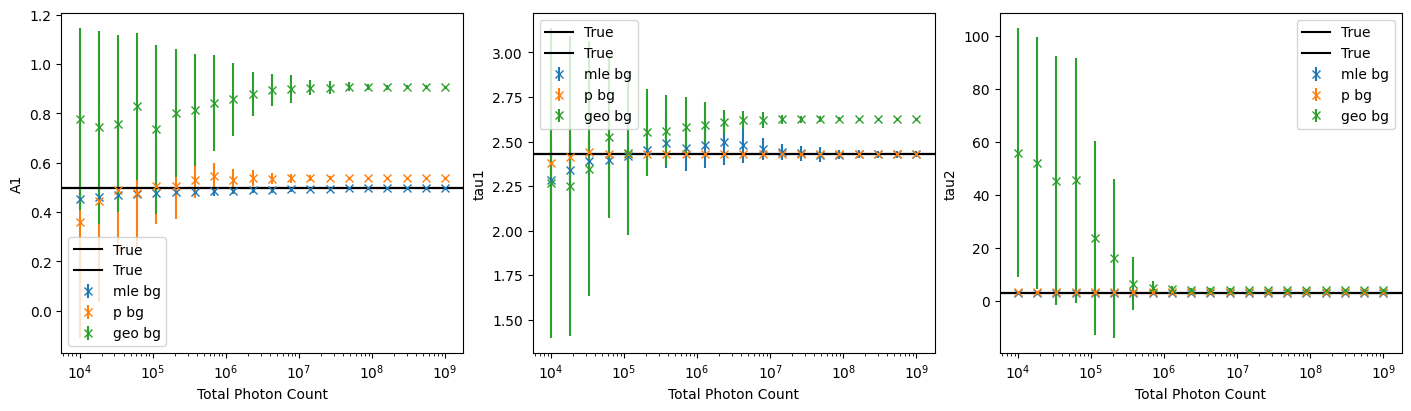

In [96]:
dev_plot(cases = ['bg'])

(<Figure size 1500x500 with 3 Axes>,
 array([<AxesSubplot:xlabel='Total Photon Count', ylabel='A1'>,
        <AxesSubplot:xlabel='Total Photon Count', ylabel='tau1'>,
        <AxesSubplot:xlabel='Total Photon Count', ylabel='tau2'>],
       dtype=object))

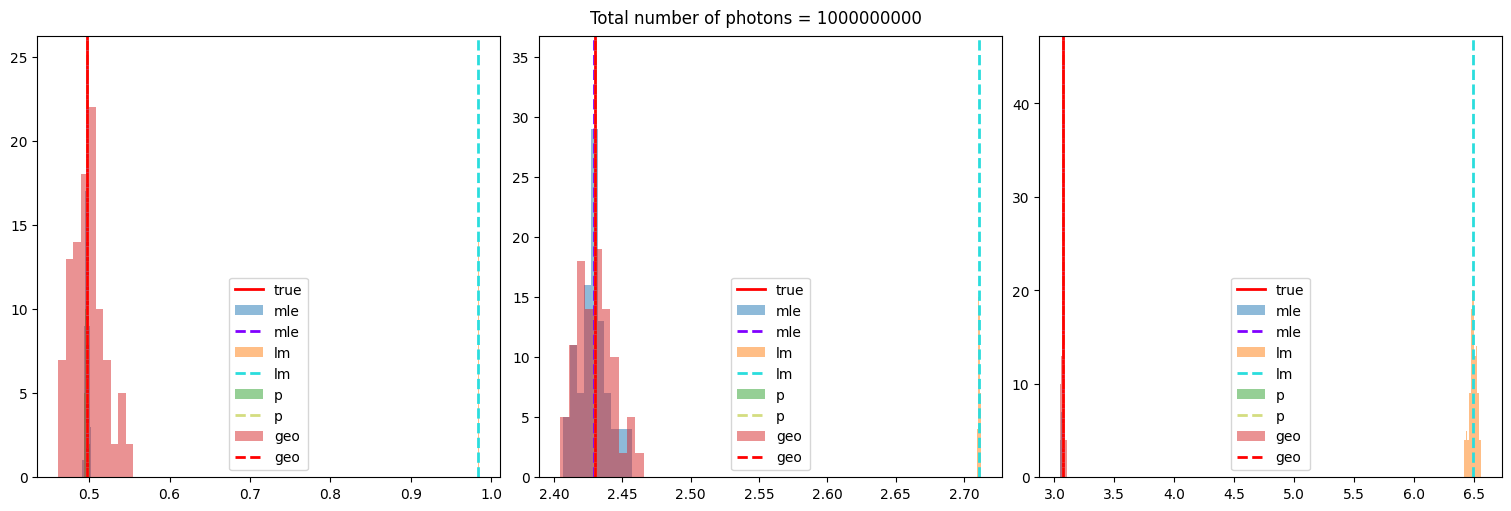

In [91]:
hist_plot(EGFP,n=19)